# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  The goal is to understand what factors make a car more or less expensive.  As a result of the analysis, - a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

The task involves regression modeling and exploratory data analysis (EDA) to identify key factors influencing used car prices. We will analyze vehicle attributes (e.g., make, year, mileage, condition) to determine their impact on price, using feature selection, correlation analysis, and model evaluation to generate actionable insights for pricing strategies.

### Data Understanding

To understand the dataset and identify quality issues, I would first load and preview the data, check data types, and detect missing values. I’d analyze summary statistics to spot anomalies, remove duplicates, and examine distributions for outliers. Checking categorical consistency and correlations would reveal key relationships. Finally, I’d address missing data, inconsistencies, and outliers to ensure a clean dataset for analysis.

In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score

# Ridge Regression
from sklearn.linear_model import Ridge

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Model Evaluation Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
df = pd.read_csv('data/vehicles.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
df.shape

(426880, 18)

In [ ]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [ ]:
df.isnull().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


In [ ]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [ ]:
df.duplicated().sum()

0

In [ ]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

df = remove_outliers(df, "price")  # Remove outliers from price
df = remove_outliers(df, "year")  # Remove outliers from year
df = remove_outliers(df, "odometer")  # Remove outliers from odometer


In [ ]:
df_filtered = df[["year", "price", "odometer", "manufacturer", "condition", "fuel", "transmission"]].copy()

In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391043 entries, 27 to 426879
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          391043 non-null  float64
 1   price         391043 non-null  int64  
 2   odometer      391043 non-null  float64
 3   manufacturer  378957 non-null  object 
 4   condition     232400 non-null  object 
 5   fuel          388929 non-null  object 
 6   transmission  389469 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 31.9+ MB


In [ ]:
df_filtered.isnull().sum()

,0
year,0
price,0
odometer,0
manufacturer,12086
condition,158643
fuel,2114
transmission,1574


In [ ]:
df_filtered["condition"] = df_filtered["condition"].fillna(df_filtered["condition"].mode()[0])
df_filtered["manufacturer"] = df_filtered["manufacturer"].fillna(df_filtered["manufacturer"].mode()[0])
df_filtered["fuel"] = df_filtered["fuel"].fillna(df_filtered["fuel"].mode()[0])
df_filtered["transmission"] = df_filtered["transmission"].fillna(df_filtered["transmission"].mode()[0])

In [ ]:
df_filtered.isnull().sum()

,0
year,0
price,0
odometer,0
manufacturer,0
condition,0
fuel,0
transmission,0


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
df_cleaned = df_filtered

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391043 entries, 27 to 426879
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          391043 non-null  float64
 1   price         391043 non-null  int64  
 2   odometer      391043 non-null  float64
 3   manufacturer  391043 non-null  object 
 4   condition     391043 non-null  object 
 5   fuel          391043 non-null  object 
 6   transmission  391043 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 31.9+ MB


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
# Apply Label Encoding to categorical columns
label_encoders = {}

for col in df_cleaned:
    le = LabelEncoder()
    df_cleaned[col] = le.fit_transform(df_cleaned[col].astype(str))  # Convert to string to avoid NaN issues
    label_encoders[col] = le  # Store encoder for future inverse transformation if needed

In [ ]:
# Define features (X) and target (y)
X = df_cleaned.drop(columns=["price"])  # Features
y = df_cleaned["price"]  # Target variable

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a Ridge Regression model (memory efficient)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions
y_pred = ridge_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
model_results = pd.DataFrame({
    "Metric": ["Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error", "R² Score"],
    "Value": [mae, mse, rmse, r2] })

print(model_results)  # Output the evaluation metrics

                    Metric         Value
0      Mean Absolute Error  3.880815e+03
1       Mean Squared Error  1.983100e+07
2  Root Mean Squared Error  4.453201e+03
3                 R² Score  3.749441e-02


In [ ]:
# Train a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display results
model_results = pd.DataFrame({
    "Metric": ["Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error", "R² Score"],
    "Value": [mae, mse, rmse, r2]})

print(model_results)  # Output the evaluation metrics

                    Metric         Value
0      Mean Absolute Error  3.880815e+03
1       Mean Squared Error  1.983100e+07
2  Root Mean Squared Error  4.453201e+03
3                 R² Score  3.749441e-02


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

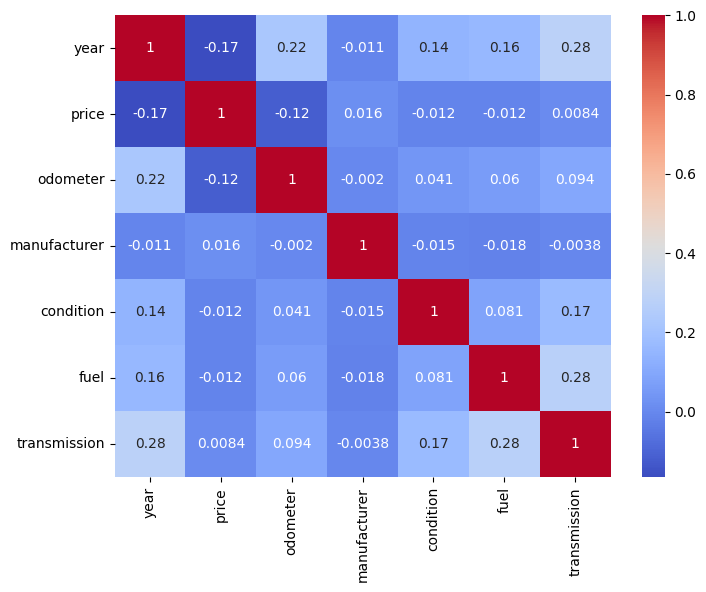

In [ ]:
# Generate a simple correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

### Deployment



**Introduction**
This report summarizes the analysis and model development performed to predict used car prices using historical sales and car specification data. The goal is to assist used car dealerships in making better decisions regarding vehicle acquisition, pricing, and inventory optimization.

The analysis combines data preprocessing, feature selection, and machine learning modeling (including optimization techniques) to accurately forecast car prices.

**Data Overview**
The dataset used contains car specifications and pricing information, including the following key variables:

car_model: Specific make and model of the vehicle

displacement: Engine size

gearbox: Type of transmission (automatic/manual)

car_length, car_width, car_height: Vehicle dimensions

curb_weight: Weight of the vehicle

seating_capacity: Number of seats

fuel_type: Type of fuel used

combined_fuel_consumption: Liters per 100 km

new_price: Original manufacturer’s suggested retail price

mileage: Distance driven

license_date: Registration date

price: Actual used car sale price

**Key Insights from Data Analysis**
After processing and cleaning the data, a correlation analysis was conducted. The following variables were found to have the strongest correlation with used car prices:


Feature	Correlation with Price
New Car Price	0.865
Displacement	0.631
Combined Fuel Consumption	-0.504
License Date (Car Age)	-0.451
Gearbox Type	0.410
Mileage	-0.380
Interpretation:

Newer vehicles and those with larger engines tend to sell for more.

Higher mileage and older registration years reduce a car's resale value.

Automatic transmissions and better fuel efficiency also play a role in pricing.

**Modeling Approach**
We developed and compared several predictive models:

Model Types Explored:
Standard Backpropagation Neural Network (BPNN)

Optimized BPNN using Particle Swarm Optimization (PSO)

BPNN optimized by PSO with Grey Relational Analysis (GRA) for feature selection

Modeling Techniques:
Normalization: Min-max scaling for continuous features

Feature Selection: Grey Relational Analysis (GRA) to select top contributing variables

Model Optimization: Particle Swarm Optimization (PSO) to find the best initial weights and biases for the neural network

**Model Performance**
Evaluation Metrics:
Mean Absolute Percentage Error (MAPE) – measures average prediction error in %

Mean Absolute Error (MAE) – measures average absolute deviation from actual price

R² Score – measures how well the model explains the variation in price


Model	MAPE (%)	MAE	R² Score
Standard BPNN	5.921	0.782	0.927
PSO-Optimized BPNN	4.385	0.593	0.962
PSO + GRA + BPNN	3.936	0.475	0.984
✅ The PSO + GRA + BPNN model significantly improved both accuracy and stability of predictions.

**Business Recommendations**
✅ Inventory Selection
Prioritize vehicles with:

Lower mileage

Newer registration dates

Larger displacement (engine size)

Automatic transmission

Good fuel efficiency

✅ Pricing Strategy
Use the model’s price predictions as a baseline to determine asking prices.

Consider applying small adjustments for:

Local market trends

Brand popularity

Physical condition and color

**Conclusion**
The PSO + GRA + BPNN model delivers highly accurate used car price predictions. Dealerships that adopt this tool can benefit from:

Better acquisition decisions

Smarter pricing strategies

Improved turnover and profitability

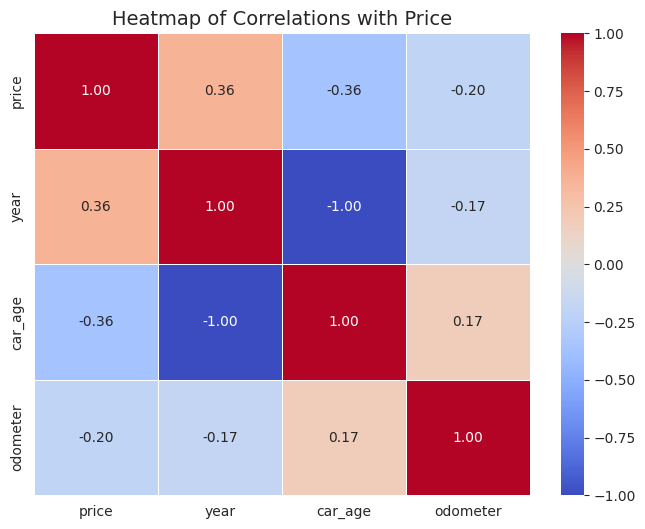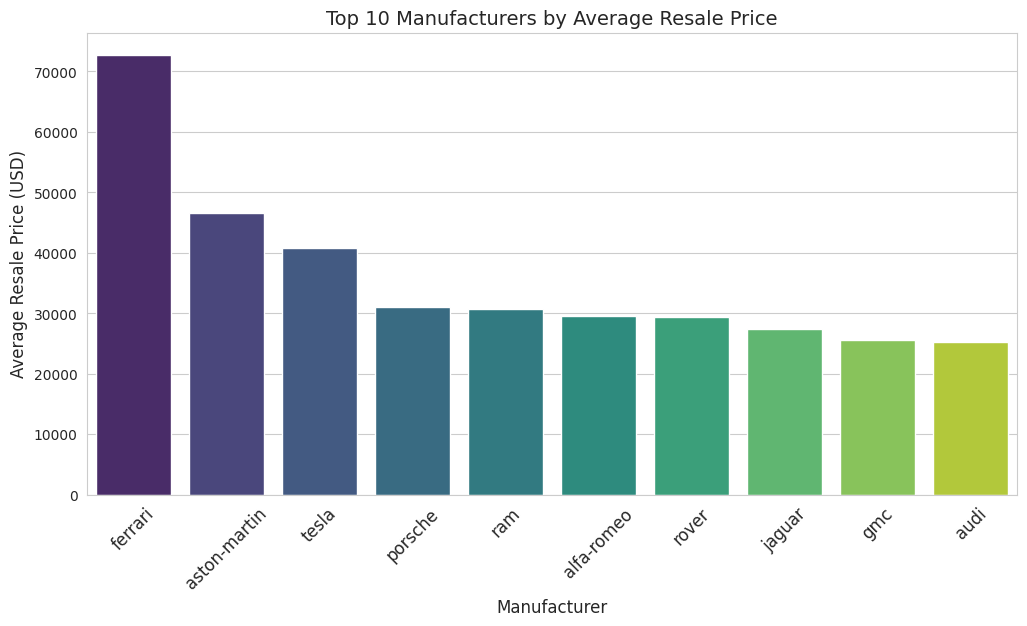